In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import transformers
import re
import torch

In [10]:
df_train = pd.DataFrame()
df_train["Sentences"] = []
df_train["Sentiment"] = []
df_train
for dirname, _, filenames in os.walk('train/neg'):
    print(len(filenames))
    for file in filenames:
        with open(os.path.join(dirname, file), 'r', encoding="utf8") as file:
            review = file.read()
            review = re.sub('<.*?>', '', review)
        df_train.loc[len(df_train.index)] = [review, 0]
for dirname, _, filenames in os.walk('train/pos'):
    print(len(filenames))
    for file in filenames:
        with open(os.path.join(dirname, file), 'r',encoding="utf8") as file:
            review = file.read().strip()
            review = re.sub('<.*?>', '', review)
        df_train.loc[len(df_train.index)] = [review, 1]
    

12500
12500


In [11]:
df_train

,Sentences,Sentiment
0,Story of a man who has unnatural feelings for ...,0
1,Airport '77 starts as a brand new luxury 747 p...,0
2,This film lacked something I couldn't put my f...,0
3,"Sorry everyone,,, I know this is supposed to b...",0
4,When I was little my parents took me along to ...,0
...,...,...
24995,"Seeing as the vote average was pretty low, and...",1
24996,"The plot had some wretched, unbelievable twist...",1
24997,I am amazed at how this movie(and most others ...,1
24998,A Christmas Together actually came before my t...,1


In [13]:
df_test = pd.DataFrame()
df_test["Sentences"] = []
df_test["Sentiment"] = []
df_test
for dirname, _, filenames in os.walk('test/neg'):
    print(len(filenames))
    for file in filenames:
        with open(os.path.join(dirname, file), 'r', encoding="utf8") as file:
            review = file.read().strip()
            review = re.sub('<.*?>', '', review)
        df_test.loc[len(df_test.index)] = [review, 0]
for dirname, _, filenames in os.walk('test/pos'):
    print(len(filenames))
    for file in filenames:
        with open(os.path.join(dirname, file), 'r', encoding="utf8") as file:
            review = file.read().strip()
            review = re.sub('<.*?>', '', review)
        df_test.loc[len(df_test.index)] = [review, 1]

12500
12500


In [14]:
df_test

,Sentences,Sentiment
0,Once again Mr. Costner has dragged out a movie...,0
1,This is an example of why the majority of acti...,0
2,"First of all I hate those moronic rappers, who...",0
3,Not even the Beatles could write songs everyon...,0
4,Brass pictures (movies is not a fitting word f...,0
...,...,...
24995,I was extraordinarily impressed by this film. ...,1
24996,"Although I'm not a golf fan, I attended a snea...",1
24997,"From the start of ""The Edge Of Love"", the view...",1
24998,"This movie, with all its complexity and subtle...",1


In [15]:
train_texts, train_labels = df_train["Sentences"], df_train["Sentiment"]
test_texts, test_labels = df_test["Sentences"], df_test["Sentiment"]

len(train_texts), len(train_labels), len(test_texts), len(test_labels)

(25000, 25000, 25000, 25000)

In [16]:
train_texts[0]

"Story of a man who has unnatural feelings for a pig. Starts out with a opening scene that is a terrific example of absurd comedy. A formal orchestra audience is turned into an insane, violent mob by the crazy chantings of it's singers. Unfortunately it stays absurd the WHOLE time with no general narrative eventually making it just too off putting. Even those from the era should be turned off. The cryptic dialogue would make Shakespeare seem easy to a third grader. On a technical level it's better than you might think with some good cinematography by future great Vilmos Zsigmond. Future stars Sally Kirkland and Frederic Forrest can be seen briefly."

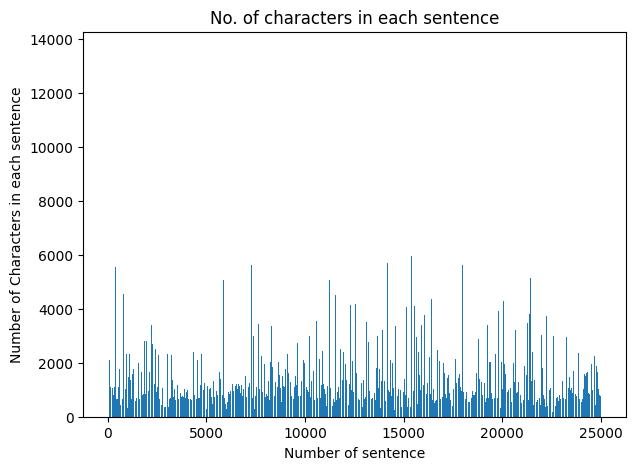

In [36]:
sentences = [len(sent) for sent in train_texts]

#plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})
# plt.bar(range(1,25001), sentences, color = ['red'])
plt.bar(range(1,25001), sentences)
plt.gca().set(title='No. of characters in each sentence', xlabel='Number of sentence', ylabel='Number of Characters in each sentence');

In [37]:
max_char = max(sentences)
max_char

13584

In [38]:
from transformers import BertTokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

c:\Python310\lib\site-packages\huggingface_hub\file_download.py:133: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Liamo Pennimpede\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


In [ ]:
sentence = train_texts[0]

['[CLS]', 'working', 'with', 'one', 'of', 'the', 'best', 'shakespeare', 'sources', ',', 'this', 'film', 'manages', 'to', 'be', 'credit', '##able', 'to', 'it', "'", 's', 'source', ',', 'whilst', 'still', 'appealing', 'to', 'a', 'wider', 'audience', '.', 'bran', '##agh', 'steals', 'the', 'film', 'from', 'under', 'fish', '##burn', '##e', "'", 's', 'nose', ',', 'and', 'there', "'", 's', 'a', 'talented', 'cast', 'on', 'good', 'form', '.', '[SEP]']
